In [1]:
# if you run this local

import os
if os.getcwd()[-10:] != "happywhale":
    os.chdir("..")

In [2]:
# if you run this online (i.e. Colab)

!git clone https://github.com/louiskhub/happywhale.git
%cd happywhale

C:\Users\Felix\Desktop\HappyWhale\happywhale\happywhale


fatal: destination path 'happywhale' already exists and is not an empty directory.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src import visualizer
import util

df = util.TRAIN_DF
df.head(5)

,image,species,individual_id,individual_counts,species_counts,label,species_label
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,1,1689,12348,18
16738,546ddeb9e61698.jpg,humpback_whale,7c3b38f5ba08,1,7392,7621,14
16742,5471e8805a8aef.jpg,dusky_dolphin,a001b65ffdfd,1,3139,9769,8
16748,547ee6a4582a34.jpg,melon_headed_whale,52b9a021286d,1,1689,5030,18
16752,548462d50b56e4.jpg,humpback_whale,e5dad0d8b4f5,1,7392,14018,14


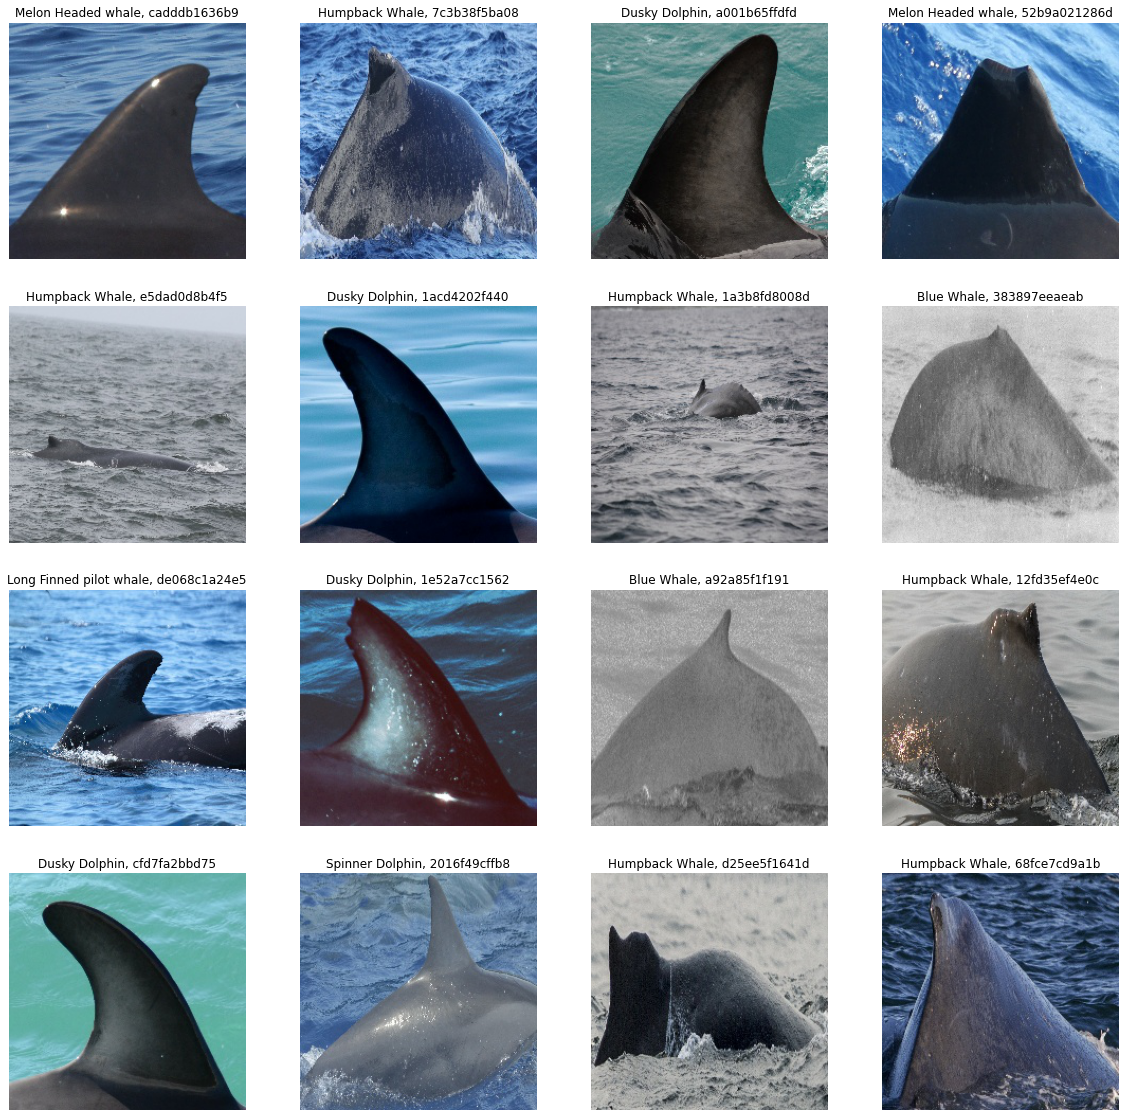

In [5]:
#@title Plotting Whales

columns=4
rows=4
fig = plt.figure(figsize=(20, 20))

for i in range(columns * rows):
      path, species, name = df.iloc[i, :3]
      img = plt.imread(util.TRAIN_DATA_PATH + "/" + path)
      fig.add_subplot(rows, columns, i + 1)
      plt.title(f"{visualizer.nicer_species_names(species)}, {name}")
      plt.axis("off")
      plt.imshow(img)
plt.show()

In [6]:
df.isnull().any()

image                False
species              False
individual_id        False
individual_counts    False
species_counts       False
label                False
species_label        False
dtype: bool

In [7]:
find_ending = np.vectorize(lambda x : x[x.find(".")+1:])
set(find_ending(df["image"].values))

{'jpg'}

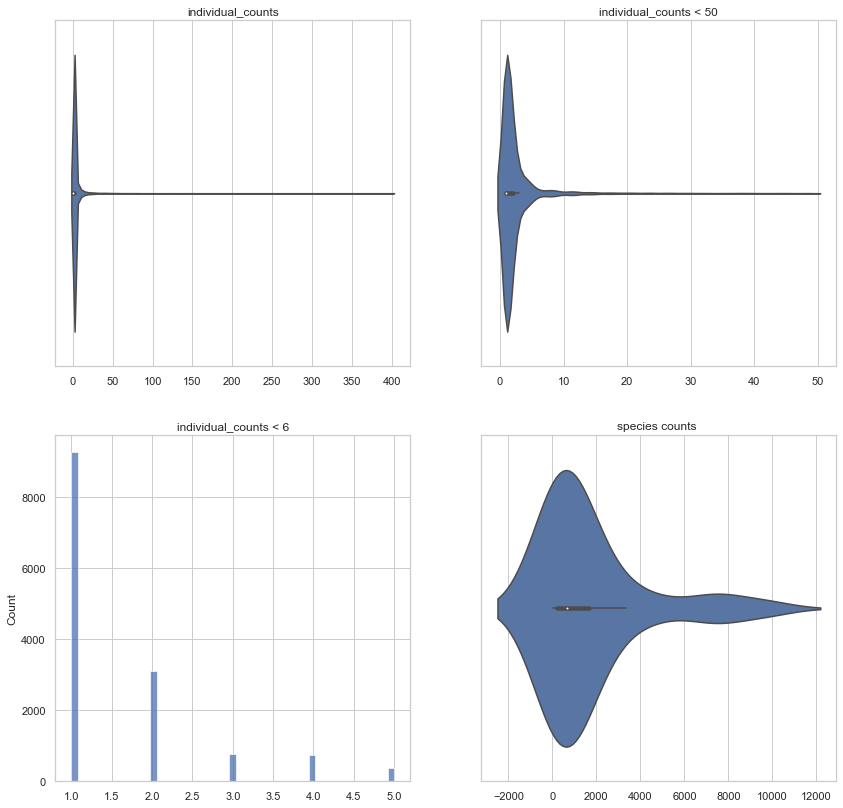




We have 9258 individuals with only one image.
9258 individuals corresponds to 59% of all individuals.
They make out 18% of the dataset.



We have 795 individuals with more then 10 images.
795 individuals corresponds to 5% of all individuals.
They make out 47% of the dataset.


In [8]:
#@title Data Analysis
individual_counts = df.value_counts("label").values
species_counts = df.value_counts("species").values



sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,14))

sns.violinplot(x=individual_counts[individual_counts < 50],ax = ax[0,1])
ax[0,1].set_title("individual_counts < 50")

sns.violinplot(x=individual_counts,ax = ax[0,0])
ax[0,0].set_title("individual_counts")
sns.histplot(x=individual_counts[individual_counts < 6],ax = ax[1,0])
ax[1,0].set_title("individual_counts < 6")
sns.violinplot(x=species_counts,ax = ax[1,1])
ax[1,1].set_title("species counts ")
plt.show()

give_nice_percentage = lambda x, y: int(100 * np.round(x/y, 2))
number_of_indiviuals_with_one_image = (individual_counts ==1).sum()
percentage_of_indiviuals_with_one_image =  give_nice_percentage(number_of_indiviuals_with_one_image,len(individual_counts))

their_amount_of_images = (df["individual_counts"]==1).sum()

percentage_data = give_nice_percentage(their_amount_of_images,len(df))
print("\n\n")
print(f"""We have {number_of_indiviuals_with_one_image} individuals with only one image.
{number_of_indiviuals_with_one_image} individuals corresponds to {percentage_of_indiviuals_with_one_image }% of all individuals.
They make out {percentage_data}% of the dataset.""")

UPPER_LIMIT_OF_IMAGES = 10
number_of_animals_above_limit= (individual_counts>UPPER_LIMIT_OF_IMAGES).sum()
percentage_of_animals_above_limit = give_nice_percentage(number_of_animals_above_limit,len(individual_counts))
their_amount_of_images = (df["individual_counts"] > UPPER_LIMIT_OF_IMAGES).sum()
percentage_data = give_nice_percentage(their_amount_of_images,len(df))
print("\n\n")
print(f"""We have {number_of_animals_above_limit} individuals with more then {UPPER_LIMIT_OF_IMAGES} images.
{number_of_animals_above_limit} individuals corresponds to {percentage_of_animals_above_limit}% of all individuals.
They make out {percentage_data}% of the dataset.""")

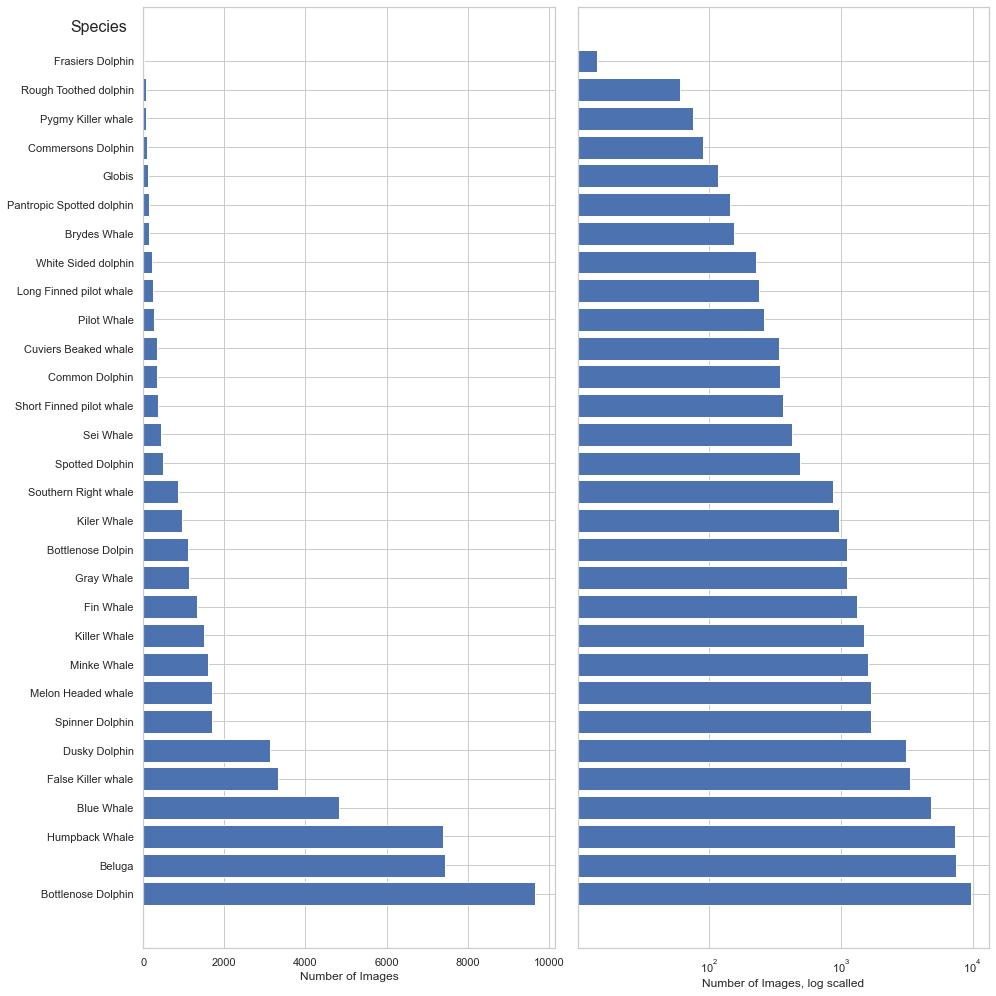

In [53]:
#@title Class Distribution

counts = df.value_counts(["species"])
names = [visualizer.nicer_species_names(n[0]) for n in counts.index]
vals = counts.values
fig, ax = plt.subplots(ncols=2,figsize=(14,14), sharey=True)
ax[0].set_xlabel("Number of Images")
ax[1].set_xlabel("Number of Images, log scalled")
ax[0].barh(names,vals)
ax[0].set_ylabel("Species",fontsize=16,rotation="horizontal",loc="top")
ax[0].yaxis.set_label_coords(-0.04,0.97)
ax[1].set_xscale('log')
ax[1].barh(names,vals)
plt.tight_layout()
plt.show()